In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
import sys, ROOT
from ROOT import gRandom, TCanvas, TFormula, TF1, TH1F, TStopwatch
from tqdm import tqdm_notebook as tqdm

a = -2
b = 2
norm = 1

def f(x, p): return ((1+(x[0])**2)/(0.001+(x[0])**2))/p[0]

def fnneuman(norm, a, b):
    fmax = f([ 0 ], [norm])
    while True:
        mu = gRandom.Uniform(0, fmax)
        r = gRandom.Uniform(a, b)
        if mu<=f( [ r ], [norm] ): return r

from math import tan, sqrt, atan
d = sqrt(0.001)
def invF(x): return d*tan(d*x*(2*atan(2/d)/d)-atan(2/d))
def g(x): return 1+x**2
def method2():
    fmax = g(b)
    while True:
        r = invF(gRandom.Uniform(0,1))
        nu = gRandom.Uniform(0, fmax)
        if (nu < g(r)):
            return r

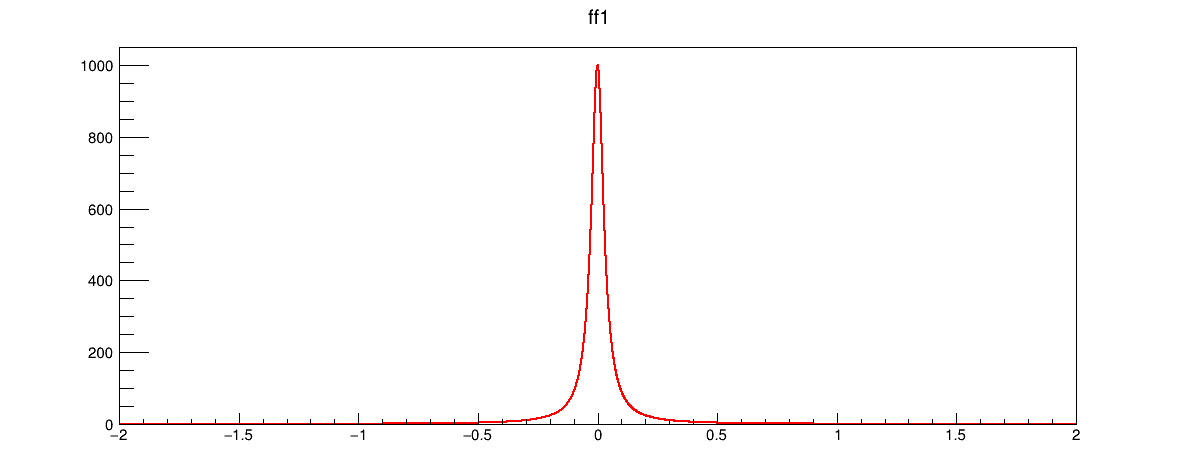

In [32]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title", 1200, 500)
ff = TF1("ff1", f, -2, 2, 1)
ff.SetNpx(10000)
ff.SetParameter(0, norm);
ff.Draw()
c.Draw();

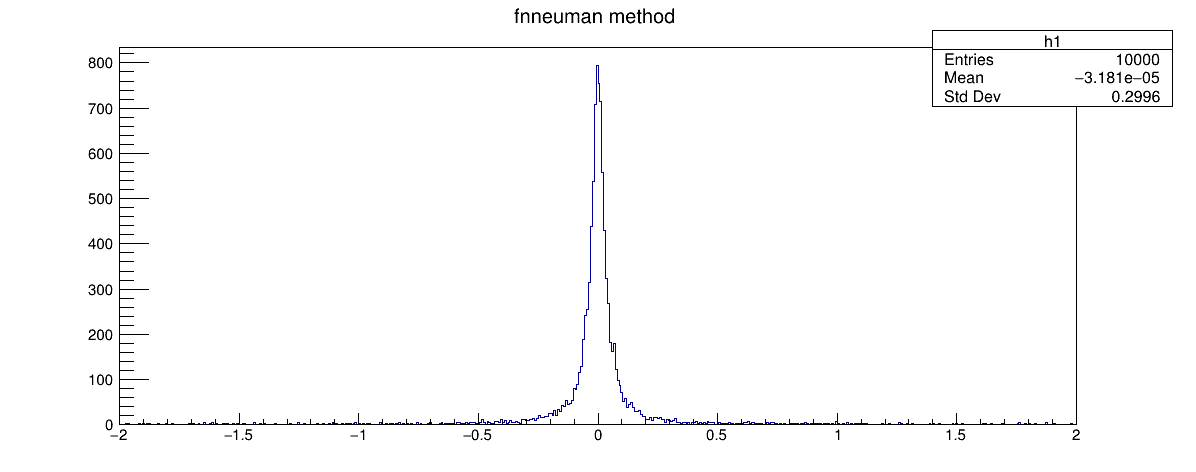

In [33]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title", 1200, 500)
ff = TF1("ff1", f, -2, 2, 1)
ff.SetNpx(10000)
ff.SetParameter(0, norm);
h1 = TH1F("h1", "fnneuman method", 500, -2, 2)
for i in tqdm(range(0, 10000)):
    h1.Fill(fnneuman(norm, a, b))
h1.Draw();
h1.Fit(ff);
c.Draw();

 FCN=312.469 FROM MIGRAD    STATUS=CONVERGED      29 CALLS          30 TOTAL
                     EDM=3.34374e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.30310e+00   1.32395e-02   1.14450e-04  -1.95326e-04


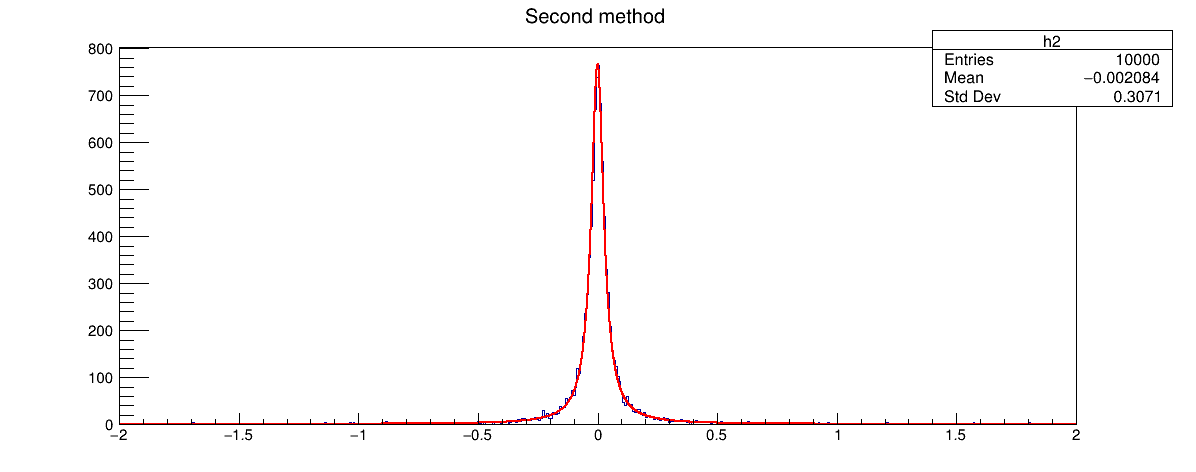

In [34]:
c = ROOT.TCanvas("myCanvasName2","The Canvas Title", 1200, 500)
ff2 = TF1("ff2", f, -2, 2, 1);
ff2.SetNpx(10000)
ff2.SetParameter(0, norm);
h2 = TH1F("h2", "Second method", 500, -2, 2)

for i in tqdm(range(0, 10000)):
    h2.Fill(method2())
h2.Draw();
h2.Fit(ff2);
c.Draw();